# 1st step : cleaning the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('user1.features_labels.csv')        #Original dataframe
df_clean = pd.read_csv('user1.features_labels.csv')  #Copy of the dataframe
df_clean_with_labels = pd.read_csv('user1.features_labels.csv')

column_mean = df.isnull().mean()
real_mean = df.mean()

for column_index in range(df.columns.size) :    

    if "label" in df.columns[column_index].lower()  :    #If the column name has label  in its name          
        del df_clean[df.columns[column_index]]

    elif column_mean[column_index] == 1 :          #Find the columns with no values inside
        del df_clean[df.columns[column_index]]
        
    elif column_mean[column_index] != 0 :          #Find the columns to fill up (with missing values)
        df_clean[df.columns[column_index]] = df_clean[df.columns[column_index]].fillna(real_mean[column_index]) #revoir remplacement


In [2]:
print("Missing values distribution: ")
print(df.isnull().mean())
print("")

Missing values distribution: 
timestamp                          0.000000
raw_acc:magnitude_stats:mean       0.000000
raw_acc:magnitude_stats:std        0.000000
raw_acc:magnitude_stats:moment3    0.000000
raw_acc:magnitude_stats:moment4    0.000000
                                     ...   
label:PHONE_IN_BAG                 1.000000
label:PHONE_ON_TABLE               0.040596
label:WITH_CO-WORKERS              0.001490
label:WITH_FRIENDS                 0.001490
label_source                       0.000000
Length: 278, dtype: float64



# 2d step : correlation matrix

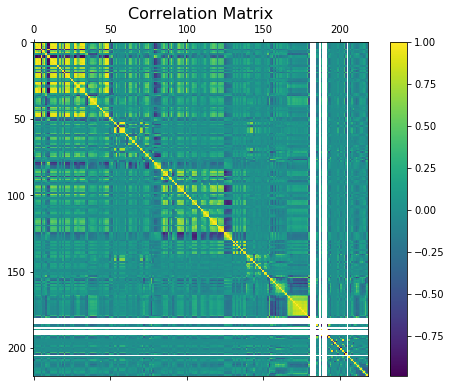

In [3]:
matrice_corr = df_clean.corr()


f = plt.figure(figsize=(8,6))
plt.matshow(matrice_corr, fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16);

# 3rd step : projection 

In [4]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA


from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df_clean),columns = df_clean.columns) 

# PCA
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

# Dump components relations with features:
analyse = abs(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))

# Finding the max values labels
liste_max = analyse.max(axis = 1)

for i in analyse:  
    if analyse[i][0] == liste_max[0] or analyse[i][1] == liste_max[1] :
        print(i)

# PC-1 = raw_acc:magnitude_stats:moment4
# PC-2 = audio_naive:mfcc8:std

raw_acc:magnitude_stats:moment4
audio_naive:mfcc8:std


In [5]:
data_scaled.std()

timestamp                              1.000186
raw_acc:magnitude_stats:mean           1.000186
raw_acc:magnitude_stats:std            1.000186
raw_acc:magnitude_stats:moment3        1.000186
raw_acc:magnitude_stats:moment4        1.000186
                                         ...   
discrete:time_of_day:between9and15     1.000186
discrete:time_of_day:between12and18    1.000186
discrete:time_of_day:between15and21    1.000186
discrete:time_of_day:between18and24    1.000186
discrete:time_of_day:between21and3     1.000186
Length: 219, dtype: float64

### PCA

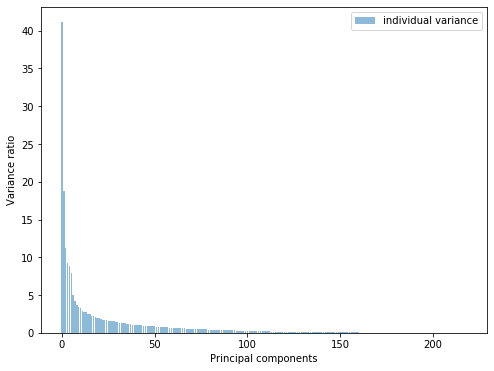

C:\Users\combe\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\combe\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


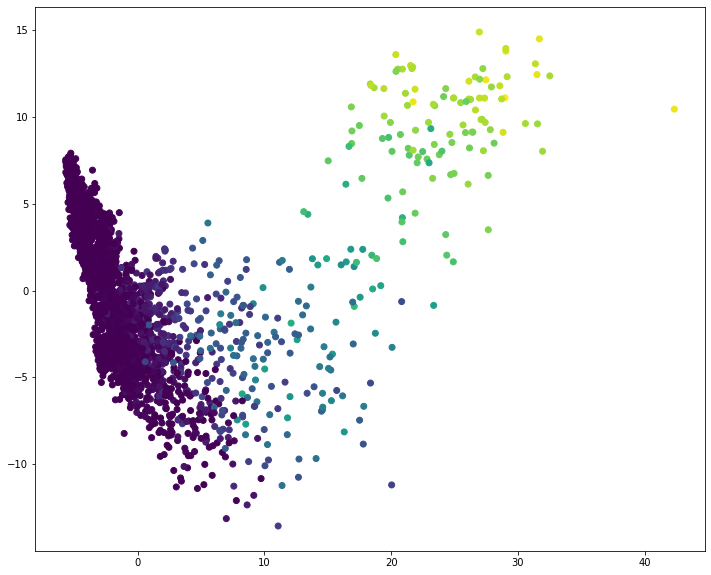

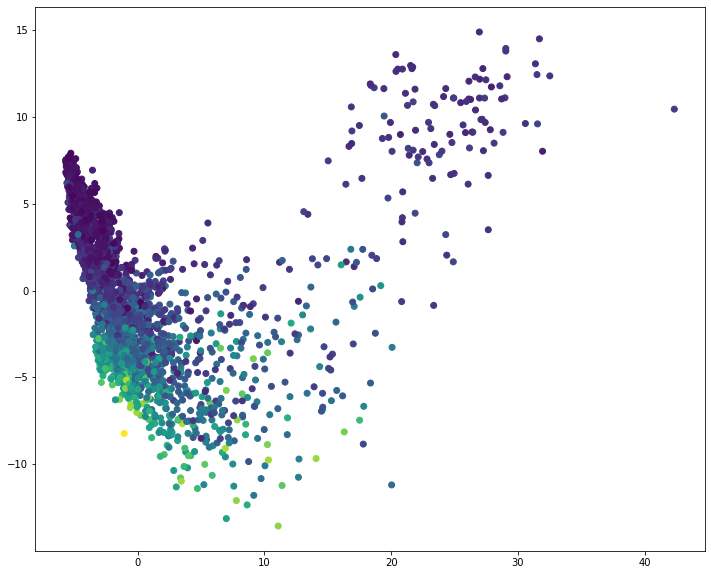

In [6]:
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_clean_scattered = scaler.fit_transform(df_clean)

# ==== Finding the number of main components ====
pca = PCA()
pca.fit_transform(df_clean_scattered)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(len(df_clean.columns)), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

# ==== Doing the PCA with n = 2 components ====

pca.n_components = 2
Z_q = pca.transform(df_clean_scattered)

fig_proj, ax = plt.subplots(figsize=(12, 10))
ax.scatter(Z_q[:, 0], Z_q[:, 1], c = (df_clean["raw_acc:magnitude_stats:moment4"] ))
fig_proj.show()


fig_proj2, ax2 = plt.subplots(figsize=(12, 10))
ax2.scatter(Z_q[:, 0], Z_q[:, 1], c = (df_clean["audio_naive:mfcc8:std"] ))
fig_proj2.show()


### tSNE

C:\Users\combe\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


'\nfig_tsne2, ax2 = plt.subplots(figsize=(8, 6))\nsc2 = ax2.scatter(z_tsne[:, 0], z_tsne[:, 1], c = (df_clean["audio_naive:mfcc8:std"] ))\n\nfig_tsne2.colorbar(sc2)\nax2.set_title("t-SNE 2")\n\nfig_tsne2.show()\n'

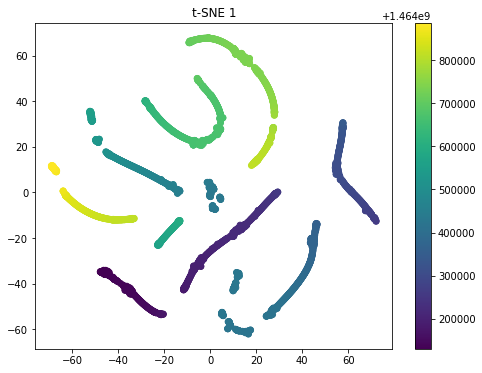

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
z_tsne = tsne.fit_transform(df_clean)

fig_tsne, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(z_tsne[:, 0], z_tsne[:, 1], c = (df["timestamp"] ))

fig_tsne.colorbar(sc)
ax.set_title("t-SNE 1")

fig_tsne.show()

"""
fig_tsne2, ax2 = plt.subplots(figsize=(8, 6))
sc2 = ax2.scatter(z_tsne[:, 0], z_tsne[:, 1], c = (df_clean["audio_naive:mfcc8:std"] ))

fig_tsne2.colorbar(sc2)
ax2.set_title("t-SNE 2")

fig_tsne2.show()
"""

# LABELING


#### Nettoyage des labels :

In [8]:
df_labels = pd.read_csv('user1.features_labels.csv')

for column in list(df) :    
    
    if not "label" in column.lower() or df[column].isnull().mean() > 0.002  :    #We only keep the discrete values and label with less than 0.2% missing values
        del df_labels[column]

In [9]:
list(df_labels)

['label:LYING_DOWN',
 'label:SITTING',
 'label:FIX_walking',
 'label:FIX_running',
 'label:SLEEPING',
 'label:IN_A_MEETING',
 'label:LOC_main_workplace',
 'label:IN_A_CAR',
 'label:ON_A_BUS',
 'label:DRIVE_-_I_M_THE_DRIVER',
 'label:DRIVE_-_I_M_A_PASSENGER',
 'label:LOC_home',
 'label:FIX_restaurant',
 'label:OR_exercise',
 'label:COOKING',
 'label:SHOPPING',
 'label:STROLLING',
 'label:DRINKING__ALCOHOL_',
 'label:BATHING_-_SHOWER',
 'label:DOING_LAUNDRY',
 'label:WASHING_DISHES',
 'label:WATCHING_TV',
 'label:SURFING_THE_INTERNET',
 'label:SINGING',
 'label:TALKING',
 'label:COMPUTER_WORK',
 'label:EATING',
 'label:TOILET',
 'label:GROOMING',
 'label:DRESSING',
 'label:STAIRS_-_GOING_UP',
 'label:STAIRS_-_GOING_DOWN',
 'label:OR_standing',
 'label:AT_SCHOOL',
 'label:WITH_CO-WORKERS',
 'label:WITH_FRIENDS',
 'label_source']

#### Creation d'un label Physically active :

In [10]:
def computePhysicalActive(line) :

    inactivity_labels = ['label:EATING','label:LYING_DOWN',"label:SITTING",'label:SLEEPING','label:ON_A_BUS','label:DRIVE_-_I_M_A_PASSENGER','label:WATCHING_TV','label:SURFING_THE_INTERNET']
    activity_labels = ['label:FIX_walking','label:FIX_running','label:IN_A_MEETING','label:DRIVE_-_I_M_THE_DRIVER','label:OR_exercise', 'label:COOKING', 'label:SHOPPING', 'label:STROLLING', 'label:DRINKING__ALCOHOL_','label:DOING_LAUNDRY', 'label:WASHING_DISHES', 'label:SINGING', 'label:COMPUTER_WORK', 'label:EATING','label:STAIRS_-_GOING_UP', 'label:STAIRS_-_GOING_DOWN', 'label:AT_SCHOOL']
    
    inactivity_bool = False
    activity_bool = False

    for label in inactivity_labels :
        if line[label] == 1 :
            inactivity_bool = True
            break

    for label in activity_labels :
        if line[label] == 1 :
            activity_bool = True
            break

    if inactivity_bool and not activity_bool :   # If inactive = -1
        return -1

    elif activity_bool and not inactivity_bool : # If active = 1
        return 1 
 
    else :                                       # If unknown = 0
        return 0

enlever les indéterminées

In [11]:
#FOR TESTS
for label in list(df_labels):
    print(df_labels[label].value_counts(),"\n")
    

0.0    1933
1.0     748
Name: label:LYING_DOWN, dtype: int64 

1.0    1543
0.0    1138
Name: label:SITTING, dtype: int64 

0.0    2523
1.0     158
Name: label:FIX_walking, dtype: int64 

0.0    2680
1.0       1
Name: label:FIX_running, dtype: int64 

0.0    2048
1.0     633
Name: label:SLEEPING, dtype: int64 

0.0    2660
1.0      21
Name: label:IN_A_MEETING, dtype: int64 

0    2094
1     591
Name: label:LOC_main_workplace, dtype: int64 

0.0    2651
1.0      30
Name: label:IN_A_CAR, dtype: int64 

0.0    2639
1.0      42
Name: label:ON_A_BUS, dtype: int64 

0.0    2646
1.0      35
Name: label:DRIVE_-_I_M_THE_DRIVER, dtype: int64 

0.0    2661
1.0      20
Name: label:DRIVE_-_I_M_A_PASSENGER, dtype: int64 

1    1438
0    1247
Name: label:LOC_home, dtype: int64 

0.0    2678
1.0       3
Name: label:FIX_restaurant, dtype: int64 

0.0    2680
1.0       1
Name: label:OR_exercise, dtype: int64 

0.0    2634
1.0      47
Name: label:COOKING, dtype: int64 

0.0    2676
1.0       5
Name: label

In [12]:
df_label_activity = pd.DataFrame(columns = ["Physically active"], data = df_labels.apply(computePhysicalActive, axis = 1))

In [13]:
df_label_activity["Physically active"].value_counts()

-1    1823
 0     632
 1     230
Name: Physically active, dtype: int64

#### t-SNE colorée en fonction du nouveau label :

C:\Users\combe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


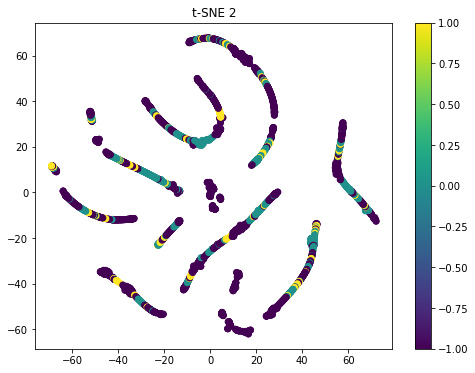

In [14]:
fig_tsne2, ax = plt.subplots(figsize=(8, 6))
sc2 = ax.scatter(z_tsne[:, 0], z_tsne[:, 1], c = (df_label_activity["Physically active"]))   #df_clean["time"]

fig_tsne2.colorbar(sc2)
ax.set_title("t-SNE 2")

fig_tsne2.show()

-> peu intéressant comme label

#### Regression logistique :

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = df_clean                                                 
y = df_label_activity["Physically active"]                    

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

logisticRegr = LogisticRegression(random_state = 0, solver = 'liblinear', multi_class = 'auto')

logisticRegr.fit(x_train, y_train)

precision = logisticRegr.score(x_test,y_test)
print(precision*100)

66.85288640595903


Précision du modèle :

# SVM

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

SVM_tests = [[],[]]

for power in [4,5,6,7,8,9,10] :
    
    for unit in [9,8,7,6,5,4,3,2,1] :
        
        gamma_param = unit * 10 ** (-power)
        SVM_tests[0].append(gamma_param)

        classifier = SVC(gamma = gamma_param)
        classifier.fit(x_train, y_train)
        SVM_tests[1].append(classifier.score(x_test, y_test))

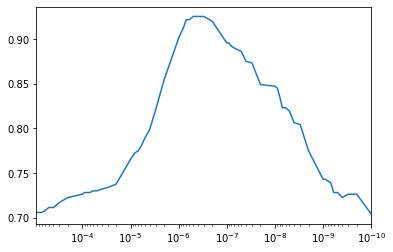

In [18]:
plt.plot(SVM_tests[0],SVM_tests[1])
plt.xscale('log')
plt.xlim(max(SVM_tests[0]),min(SVM_tests[0]))
plt.show()

In [19]:
for index in range(len(SVM_tests[0])):
    if SVM_tests[1][index] == max(SVM_tests[1]) :
        print("\n[Maximum Value] Accuracy :",SVM_tests[1][index],"| Gamma =",SVM_tests[0][index],"\n")
    else : 
        print("Accuracy :",SVM_tests[1][index],"| Gamma =",SVM_tests[0][index])


Accuracy : 0.7057728119180633 | Gamma = 0.0009000000000000001
Accuracy : 0.7057728119180633 | Gamma = 0.0008
Accuracy : 0.7057728119180633 | Gamma = 0.0007
Accuracy : 0.707635009310987 | Gamma = 0.0006000000000000001
Accuracy : 0.7113594040968343 | Gamma = 0.0005
Accuracy : 0.7113594040968343 | Gamma = 0.0004
Accuracy : 0.7169459962756052 | Gamma = 0.00030000000000000003
Accuracy : 0.7225325884543762 | Gamma = 0.0002
Accuracy : 0.7262569832402235 | Gamma = 0.0001
Accuracy : 0.7281191806331471 | Gamma = 9e-05
Accuracy : 0.7281191806331471 | Gamma = 8e-05
Accuracy : 0.7281191806331471 | Gamma = 7.000000000000001e-05
Accuracy : 0.7299813780260708 | Gamma = 6.000000000000001e-05
Accuracy : 0.7299813780260708 | Gamma = 5e-05
Accuracy : 0.7318435754189944 | Gamma = 4e-05
Accuracy : 0.7337057728119181 | Gamma = 3.0000000000000004e-05
Accuracy : 0.7374301675977654 | Gamma = 2e-05
Accuracy : 0.7653631284916201 | Gamma = 1e-05
Accuracy : 0.7690875232774674 | Gamma = 9e-06
Accuracy : 0.7728119180

In [20]:
best_gamma = SVM_tests[0][SVM_tests[1].index(max(SVM_tests[1]))]

In [22]:
df_label_activity["Physically active"]  

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2680   -1
2681   -1
2682   -1
2683    1
2684    1
Name: Physically active, Length: 2685, dtype: int64